In [1]:
import bmcs_utils.api as bu
import traits.api as tr
import numpy as np
import ibvpy.api as ib
import numpy as np

In [2]:
fe_grid = tr.Property(bu.Instance(ib.XDomainFEGrid), depends_on='state_changed')
n_x, n_y = 10, 10
L_x, L_y = 10, 10
ib.XDomainFEGrid(coord_min=(L_x, 0),
                coord_max=(0, L_y),
                integ_factor=1,
                shape=(n_x-1, n_y-1), # number of elements!
                fets=ib.FETS2D4Q());

In [3]:
print(ib.XDomainFEGrid(coord_min=(L_x, 0),
                coord_max=(0, L_y),
                integ_factor=1,
                shape=(n_x-1, n_y-1), # number of elements!
                fets=ib.FETS2D4Q()))

In [4]:
from bmcs_shear.dic_crack import DICGrid, DICAlignedGrid, DICCOR, DICInspector, DICCrack

In [16]:
from os.path import expanduser, join
import os
home_dir = expanduser('~')
data_dir = join(home_dir,'simdb','data','shear_zone','B1_TV1')
data_dir

'C:\\Users\\fahad\\simdb\\data\\shear_zone\\B1_TV1'

In [15]:
results = [join(data_dir,each) 
           for each in sorted(os.listdir(data_dir)) 
           if each.endswith('.csv')]
results

['C:\\Users\\fahad\\simdb\\data\\shear_zone\\B1_TV1\\Step_01_Load_000_KN.csv',
 'C:\\Users\\fahad\\simdb\\data\\shear_zone\\B1_TV1\\Step_02_Load_013_KN.csv',
 'C:\\Users\\fahad\\simdb\\data\\shear_zone\\B1_TV1\\Step_03_Load_024_KN.csv',
 'C:\\Users\\fahad\\simdb\\data\\shear_zone\\B1_TV1\\Step_04_Load_039_KN.csv',
 'C:\\Users\\fahad\\simdb\\data\\shear_zone\\B1_TV1\\Step_05_Load_050_KN.csv',
 'C:\\Users\\fahad\\simdb\\data\\shear_zone\\B1_TV1\\Step_06_Load_066_KN.csv',
 'C:\\Users\\fahad\\simdb\\data\\shear_zone\\B1_TV1\\Step_07_Load_077_KN.csv',
 'C:\\Users\\fahad\\simdb\\data\\shear_zone\\B1_TV1\\Step_08_Load_087_KN.csv',
 'C:\\Users\\fahad\\simdb\\data\\shear_zone\\B1_TV1\\Step_09_Load_103_KN.csv',
 'C:\\Users\\fahad\\simdb\\data\\shear_zone\\B1_TV1\\Step_10_Load_113_KN.csv',
 'C:\\Users\\fahad\\simdb\\data\\shear_zone\\B1_TV1\\Step_11_Load_125_KN.csv',
 'C:\\Users\\fahad\\simdb\\data\\shear_zone\\B1_TV1\\Step_12_Load_136_KN.csv',
 'C:\\Users\\fahad\\simdb\\data\\shear_zone\\B1_TV1\

In [18]:
np.loadtxt(results[0], dtype=float, 
            skiprows=1, delimiter=',', usecols=(2,3), unpack=False)

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [24]:
files = [join(data_dir, each)
               for each in sorted(os.listdir(data_dir))
               if each.endswith('.csv')]

In [25]:
u_tpa = np.array([
            np.loadtxt(csv_file, dtype=float,
                       skiprows=1, delimiter=',', usecols=(2,3), unpack=False)
            for csv_file in files
        ], dtype=np.float_)
u_tpa

array([[[  0.   ,   0.   ],
        [  0.   ,   0.   ],
        [  0.   ,   0.   ],
        ...,
        [  0.   ,   0.   ],
        [  0.   ,   0.   ],
        [  0.   ,   0.   ]],

       [[  0.437,  -0.225],
        [  0.43 ,  -0.218],
        [  0.426,  -0.212],
        ...,
        [  0.431,  -0.285],
        [  0.436,  -0.283],
        [  0.436,  -0.278]],

       [[  0.51 ,  -0.36 ],
        [  0.485,  -0.362],
        [  0.496,  -0.365],
        ...,
        [  0.436,  -0.615],
        [  0.436,  -0.607],
        [  0.447,  -0.611]],

       ...,

       [[  1.854,  -1.189],
        [  1.847,  -1.382],
        [  1.847,  -1.595],
        ...,
        [ -0.441, -10.489],
        [ -0.396, -10.526],
        [ -0.364, -10.535]],

       [[  1.832,  -1.187],
        [  1.839,  -1.382],
        [  1.853,  -1.593],
        ...,
        [ -0.445, -10.505],
        [ -0.41 , -10.526],
        [ -0.364, -10.545]],

       [[  1.835,  -1.183],
        [  1.832,  -1.374],
        [  1.835

In [28]:
n_t, n_e, n_a = u_tpa.shape # get the dimensions of the time and entry dimensions
n_x, n_y = 59, 15

In [42]:
u_tjia = u_tpa.reshape(n_t, n_y, n_x, 2) # for numbering from bottom right to left
u_tija = np.einsum('tjia->tija', u_tjia)
u_val = u_tija

In [43]:
dic_grid = DICGrid()
end_t = dic_grid.end_t
u_ija = u_tjia[end_t]
U_Ia = u_ija.reshape(-1, 2)
U_o = U_Ia.flatten()

In [48]:
fe_grid = tr.Property(bu.Instance(ib.XDomainFEGrid), depends_on='state_changed')
U_o = U_o
U_Eia = U_o[fe_grid.o_Eia]
#u_Ema = np.einsum('im,Eia->Ema', self.fe_grid.fets.N_im, U_Eia)
#u_Ea = np.average(u_Ema, axis=1)

AttributeError: 'ForwardProperty' object has no attribute 'o_Eia'

In [45]:
U_Eia

NameError: name 'U_Eia' is not defined

In [1]:
from os.path import expanduser, join
import os
home_dir = expanduser('~')
data_dir = join(home_dir,'simdb','data','shear_zone', 'load_deflection')
data_dir

'C:\\Users\\fahad\\simdb\\data\\shear_zone\\load_deflection'

In [2]:
results = [join(data_dir,each) 
           for each in sorted(os.listdir(data_dir)) 
           if each.endswith('.csv')]
results

['C:\\Users\\fahad\\simdb\\data\\shear_zone\\load_deflection\\B1_TV1.csv']

In [3]:
import numpy as np
np.loadtxt(results[0], dtype=float, 
            skiprows=1, delimiter=None , usecols=(2,3), unpack=False)

IndexError: list index out of range

In [3]:
import pandas as pd
results_up = pd.read_csv(results[0], sep = None, decimal=",", skiprows=1, delimiter=None)

C:\Users\fahad\Anaconda3\envs\bmcs_env\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [8]:
import numpy as np
ld = np.array(results_up)
deflection = ld[:,2]
load = ld[:,1]

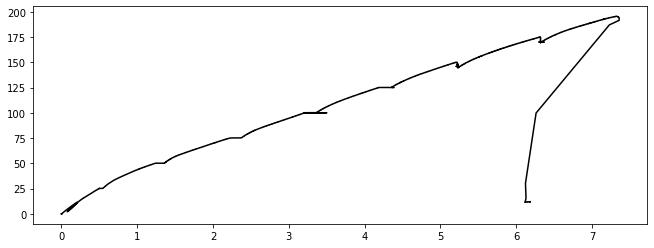

In [10]:
import matplotlib.pylab as plt
_, ax1 = plt.subplots(1, 1, figsize=(11,4))

ax1.plot(deflection, -load, color = 'black')
plt.savefig("D:\\Shear zones\drawings\Load_def_B6.pdf")